# Introduction to regularized regression

Despite ordinary least squares (OLS) being the best unbiased linear estimator, biased (regularized) estimators can achieve lower mean-squared error especially on unseen or held out data. This is because regularization reduces variance in order to improve model predictions on cross-validated data. Regularization is also particularly useful when there is multicollinearity between your regressors. OLS suffers from large standard errors on the $\beta$ estimates in this regime.

When building encoding models for neural data, regressors often may be collinear. Let's take a basic example of a mouse that must press a lever to recieve a food reward. If a food reward is delivered every time the lever is pressed, it will be quite difficult to separate out the neural encoding of action (lever pressing) from the encoding of reward (recieving food) because these variables always occur together (and occur closely in time). When designing behavioral tasks, think how you might avoid collinearities.


### Ridge, lasso and ordinary least squares (OLS)
The goal of regression is to minimize the sum of squared errors (SSE). Below are shown the different SSE formulations for OLS, ridge, and lasso regression.
$$
SSE_{OLS} = \sum_{i=1}^{n}{(y_i - \hat{y}_i)^2}
$$
$$
SSE_{Ridge} = \sum_{i=1}^{n}{(y_i - \hat{y}_i)^2} + \alpha\sum_{j=1}^{P}{\beta_j^2}
$$
$$
SSE_{Lasso} = \sum_{i=1}^{n}{(y_i - \hat{y}_i)^2} + \lambda\sum_{j=1}^{P}{|\beta_j|}
$$
You can see that the ridge and lasso equations include an additional term that penalizes large $\beta$ values. The only difference between ridge and lasso is that ridge is squared and lasso takes the absolute value of the weights instead. By minimizing these functions, we can compute the OLS and Ridge estimators! We will skip over the derivation of the closed form solutions, but just know that they come from minimizing the above equations. 

$$
\hat{\beta}_{OLS} = (X^TX)^{-1}X^Ty
$$
$$
\hat{\beta}_{Ridge} = (X^TX + \alpha I)^{-1}X^Ty
$$
Lasso regression has no closed form solution. It must be solved with other techniques such as gradient descent, so we will omit it for now.


In [1]:
#First import the standard toolboxes
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#Import the specific functions for this class
#import encoding_tools

We will import a dataset that gives the average miles per gallon (MPG) for many different cars. The displacement, horsepower, cylinders, and other information about the cars is also included. We will try to see how well we can predict fuel efficiency from these variables.

In [2]:
PREDICTOR_LABELS = ['cylinders','displacement','horsepower','weight','acceleration','model_year','american','japanese']
dataset = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


The shape of x is (392, 8)
The shape of y is (392,)


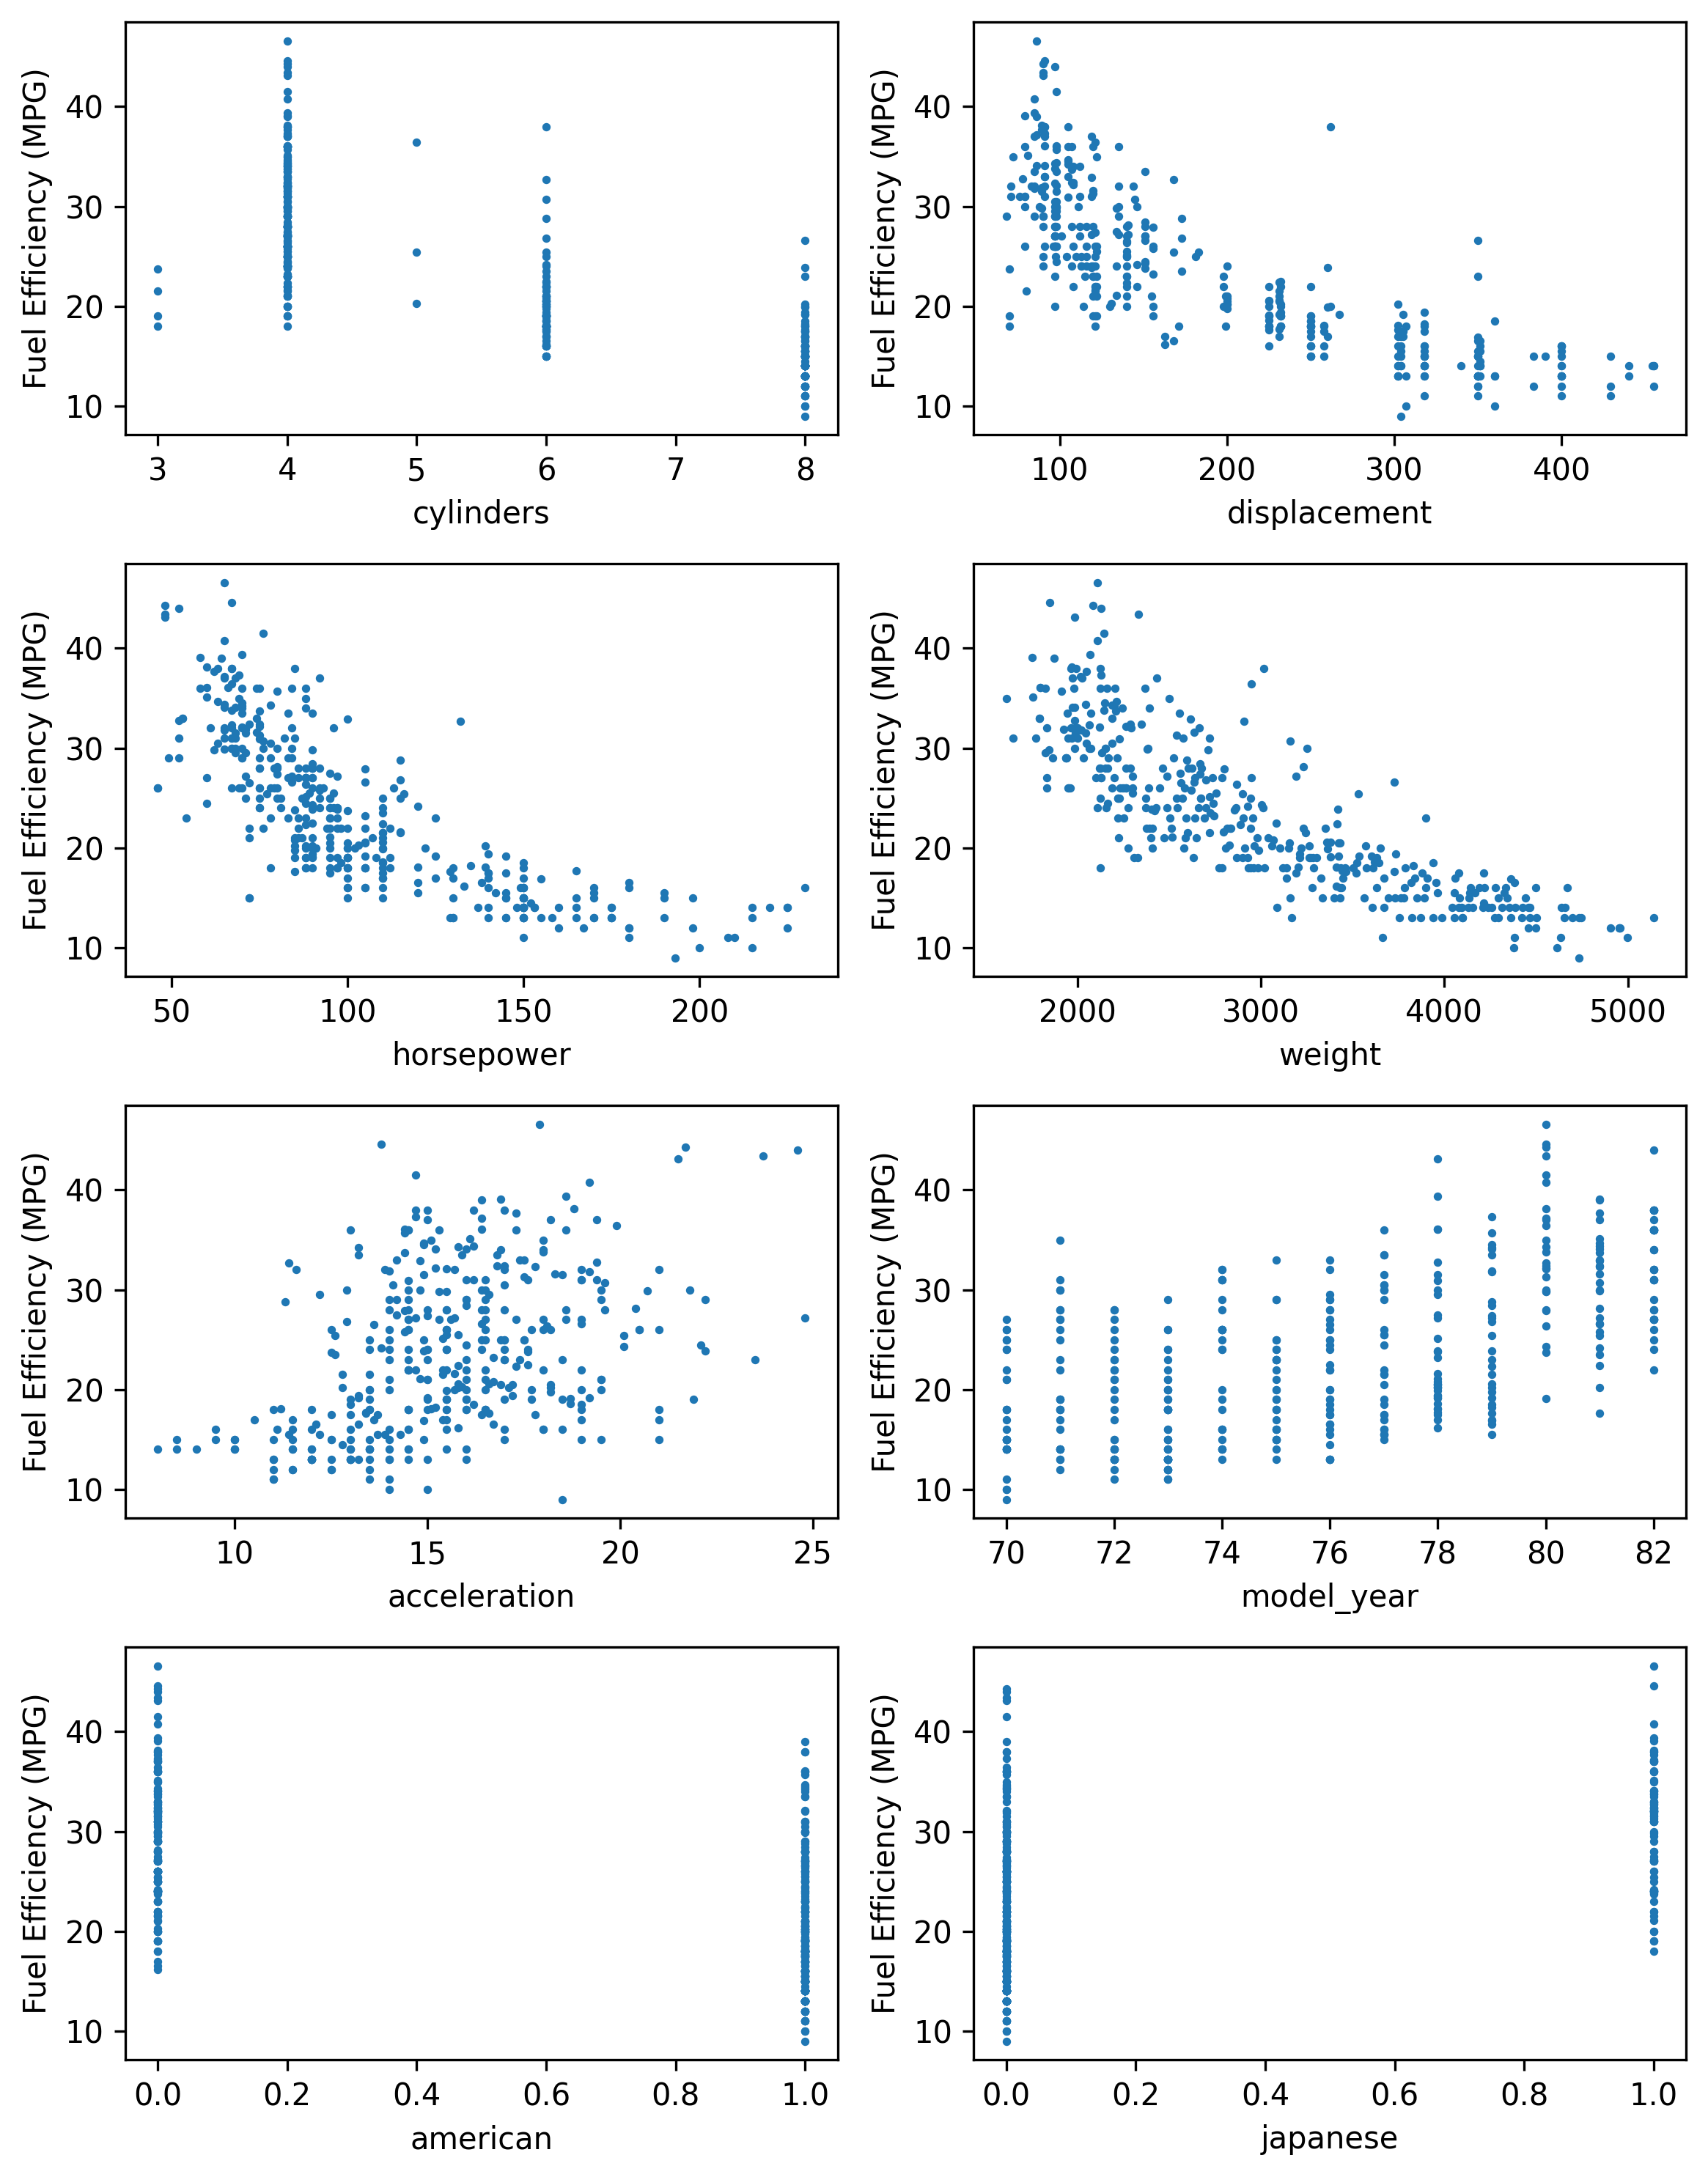

In [28]:
# Preprocess the data
dataset = dataset.dropna()
y = dataset.mpg.values
x = dataset[PREDICTOR_LABELS[:-2]].to_numpy()

is_american = (dataset.origin == 'usa').values #dummy variable
is_japanese = (dataset.origin == 'japan').values #dummy variable
x = np.vstack((x.T, is_american, is_japanese)).T

print(f'The shape of x is {x.shape}')
print(f'The shape of y is {y.shape}')

fig,axs = plt.subplots(4,2,figsize=(8,10),dpi=300)
for i,ax in enumerate(np.ravel(axs)):
    ax.scatter(x[:,i],y, s=3)
    ax.set_xlabel(PREDICTOR_LABELS[i])
    ax.set_ylabel('Fuel Efficiency (MPG)')
fig.tight_layout()



### Excercise 1: Implement OLS and Ridge regression
Use the equations at the beginning of the notebook to compute the $\beta$ estimates using OLS and ridge regression. 

In [ ]:
def ols_solver(x,y):
    betas = np.linalg.inv(x.T@x)@x.T@y # the @ symbol is equivalent to np.matmul()
    return betas

def ridge_solver(x,y,alpha):
    betas = np.linalg.inv(x.T@x + alpha*np.identity(x.shape[1]))@x.T@y
    return betas

ols_betas = ols_solver(x,y)
ALPHA = 1000
ridge_betas = ridge_solver(x,y,ALPHA)
print(ols_betas)
print(ridge_betas)

assert np.array_equiv(ols_betas,ridge_betas), "Not equal, try setting alpha to 0"


[-0.69260999  0.02621823 -0.03955028 -0.00626259 -0.06443125  0.6241756
 -2.49575482  0.37046668]
[-0.03988157  0.00224067 -0.01510855 -0.00641788  0.01570618  0.57560312
 -0.11299823  0.07434138]


AssertionError: Not equal, try setting alpha to 0